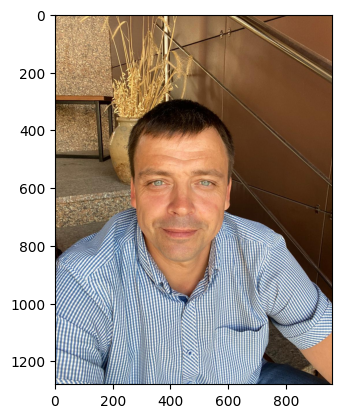

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


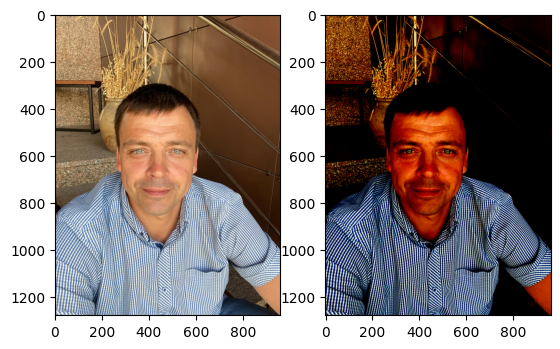

Original image: 121.13075520833333 66.83286290921804
Normed image: -0.0499548611111111 0.5241793169350436


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('test_foto.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.dtype, img.ndim, img.shape, img.size
img_normed = img / 127.5 - 1.0
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(img_normed)
plt.show()
print("Original image:", img.mean(), img.std())
print("Normed image:", img_normed.mean(), img_normed.std())

In [5]:
img_normed = img / 127.5 - 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


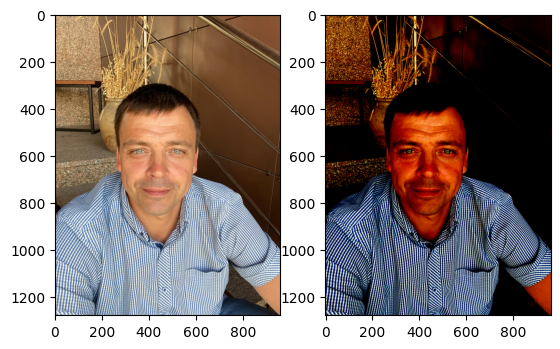

Original image: 121.13075520833333 66.83286290921804
Normed image: -0.0499548611111111 0.5241793169350436


In [4]:
img_normed = img / 127.5 - 1.0
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(img_normed)
plt.show()
print("Original image:", img.mean(), img.std())
print("Normed image:", img_normed.mean(), img_normed.std())


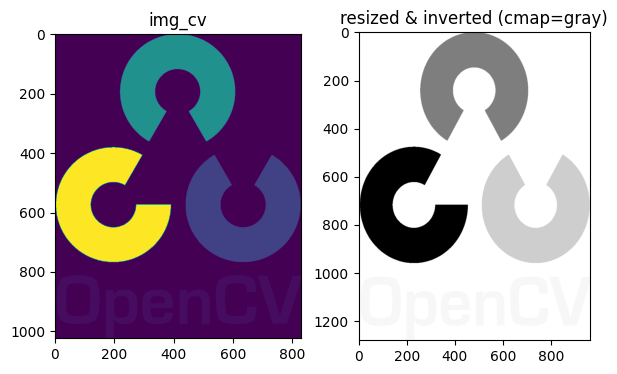

img_cv shape: (1024, 831)
resized & inverted shape: (1280, 960)


In [7]:



img_cv = cv2.imread('opencv.png', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[:2]
img_cv_resized = cv2.resize(img_cv, (w, h), interpolation=cv2.INTER_AREA)
img_cv_inv = 255 - img_cv_resized
_, ax = plt.subplots(1, 2, figsize=(7, 4))
ax[0].imshow(img_cv)
ax[1].imshow(img_cv_inv, cmap='gray')
ax[0].set_title('img_cv')
ax[1].set_title('resized & inverted (cmap=gray)')
plt.show()
print("img_cv shape:", img_cv.shape)
print("resized & inverted shape:", img_cv_resized.shape)


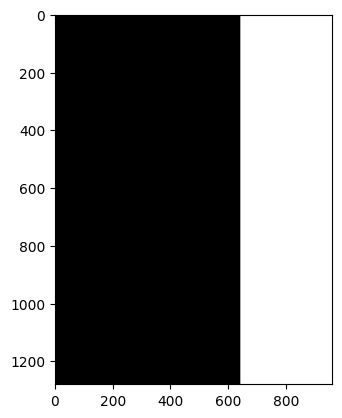

0 255


In [8]:
img_cv_inv = np.zeros((1280, 960, 3), dtype = 'uint8')
mask = np.zeros(img.shape, dtype='uint8')
width = img_cv_inv.shape[0]
mask[:, width//2:] = 255
plt.imshow(mask)
plt.show()
print(mask.min(), mask.max())

In [9]:
lam = 0.5
img_composed = img.copy()
img_composed = lam * img + (1 - lam) * img_cv_inv[..., np.newaxis]
np.putmask(img_composed, mask=mask, values=0)
plt.imshow(img_composed.astype('uint8'))
plt.show()


ValueError: operands could not be broadcast together with shapes (1280,960,3) (1280,960,3,1) 